In [3]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt

from pyiga import bspline, assemble, geometry, solvers, vis, topology, vform

from scipy.io import mmwrite

In [5]:
np.set_printoptions(linewidth=100000)

setting up constraints took 0.004689693450927734 seconds.
Basis setup took 0.003757476806640625 seconds


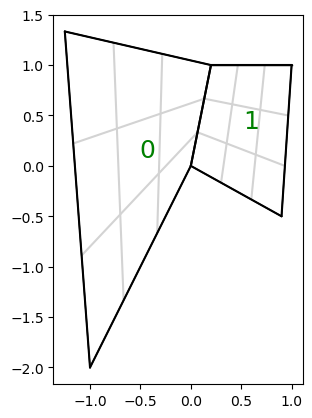

In [6]:
deg, N = 2,3

geo1 = geometry.Quad(np.array([[0,0],[-1,-2],[1/5,1],[-5/4,4/3]]).T)
geo2 = geometry.Quad(np.array([[0,0],[9/10,-1/2],[1/5,1],[1,1]]).T)

#geo1=geometry.unit_square()
#geo2=geometry.unit_square().translate((1,0))
kvs = 2 * (bspline.make_knots(deg, 0.0, 1.0, N),)

M = topology.PatchMesh([(kvs,geo1),(kvs,geo2)])
MP = assemble.Multipatch(M, automatch=1)
M.draw(knots=1,patch_idx=1)

In [9]:
Ah = MP.assemble_volume('(u * v) * dx', arity=2, decoupled=1).tocsr()

In [10]:
Ah.shape

(50, 50)

In [11]:
Ah[25:,25:].toarray()

array([[4.49382716e-03, 2.68724280e-03, 3.90946502e-04, 0.00000000e+00, 0.00000000e+00, 2.58847737e-03, 1.54835391e-03, 2.25308642e-04, 0.00000000e+00, 0.00000000e+00, 3.66255144e-04, 2.19135802e-04, 3.18930041e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.68724280e-03, 8.01646091e-03, 5.20781893e-03, 2.20164609e-04, 0.00000000e+00, 1.54835391e-03, 4.62139918e-03, 3.00360082e-03, 1.27057613e-04, 0.00000000e+00, 2.19135802e-04, 6.54320988e-04, 4.25411523e-04, 1.80041152e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.90946502e-04, 5.20781893e-03, 1.45308642e-02, 5.80041152e-03, 4.89711934e-04, 2.25308642e-04, 3.00360082e-03, 8.38580247e-03, 3.34927984e-03, 2.82921811e-04, 3.18930041e-05

In [27]:
mmwrite("biharmonic_stiffness_p"+str(deg)+"_n"+str(N)+"_r"+str(deg-1)+".mtx", Ah)